<a href="https://colab.research.google.com/github/jhportfolio1/MsAiSchool_05_Linux/blob/main/Linux09_Kubernetes_Service.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 사전지식

>## 1) IP
- IPv4 : 총 32비트의 숫자 구성 4,294,967,296개
- 588,514,304개는 특정 목적으로 선점되어 있음
- 총 사용가능한 IP : 3,706,452,992개
- 충분하지 않아서 IPv6 추가로 사용

>## 2) DHCP
- 동적 호스트 구성 프로토콜
- IP를 호스트하는 IP주소, 서브넷 마스크, 기본 게이트웨이 등의 구성정보 제공하는 클라이언트/서버 프로토콜
- 공유기(게이트웨이)가 내부 IP를 자동으로 할당해주는 것도 DHCP임

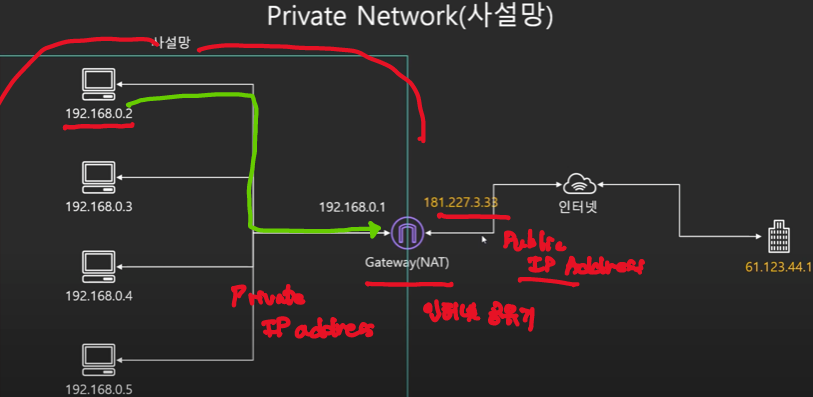

# 2. Service
- Docker 가 게이트웨이 역할을 해서, IP를 할당해줌

>## 1) 개념
- Pod : IP 할당받고 생성되지만, 생성/소멸되며 그 과정에서 IP는 항상 재할당받기에 고정된 IP로 원하는 POD에 접근할 수 없음
- 클러스터 내부/외부에서 POD 접근할때 Pod의 IP 아닌 Service 통해 접근하는 방식

- 서비스
> 쿠버네티스에 배포한 애플리케이션(Pod)을 외부에서 접근하기 쉽게 추상화한 리소스 </br>
> Service : 고정된 IP, 단수/복수 개의 Pod과 매칭됨</br>
> 클라이언트가 service 주소로 접근하면, 실제로는 service에 매칭된 pod에 접속할 수 있게됨

>## 2) Service 의 Type

>>### (1) NodePort
- 쿠버네티스 클러스터 내부에 배포된 서비스에 클러스터 외부 접근 가능
- IP : POD이 떠 있는 노드(머신)의 IP 사용
- Port : 할당받은 Port 사용

>>### (2) Load Balance
- 쿠버네티스 클러브터를 퇴부에서 접근 함
- LoadBalancing 모듈 추가적 필요

>>### (3) ClusterIP
- 고정된 IP, PORT 제공하지만, 클러스터 내부에서만 접근할 수 있는 대역 주소 할당

>>### (4) 실무방식
- 쿠버네티스 클러스터에 LoadBalancing 모듈(MetalLB 등) 설치 -> LoadBalancer 타입으로 서비스 expose

- Deployment

In [ ]:
apiVersion: v1
kind: Service
metadata:
  name: my-nginx
  labels:
    run: my-nginx
  spec:
    type: NodePort  #서비스타입 명시
    ports:
      port: 80
      protocol: TCP
    selector:       #아래 label 가진 pod 매핑함
      app: nginx

- Service 생성

In [ ]:
vi service.yaml 

In [ ]:
kubectl apply -f service.yaml

In [ ]:
kubectl get service

In [ ]:
curl -X GET $(minikube ip):<PORT>

>## 3) 실습

>>### (1) 도커 연결 및 권한/이미지 생성

- 도커 연결

In [ ]:
sudo apt-get remove docker docker-engine docker.io containerd runc

In [ ]:
sudo apt-get update
sudo apt-get install \
    ca-certificates \
    curl \
    gnupg

In [ ]:
sudo install -m 0755 -d /etc/apt/keyrings
curl -fsSL https://download.docker.com/linux/ubuntu/gpg | sudo gpg --dearmor -o /etc/apt/keyrings/docker.gpg
sudo chmod a+r /etc/apt/keyrings/docker.gpg

In [ ]:
echo \
  "deb [arch="$(dpkg --print-architecture)" signed-by=/etc/apt/keyrings/docker.gpg] https://download.docker.com/linux/ubuntu \
  "$(. /etc/os-release && echo "$VERSION_CODENAME")" stable" | \
  sudo tee /etc/apt/sources.list.d/docker.list > /dev/null

In [ ]:
curl -fsSL https://download.docker.com/linux/ubuntu/gpg | sudo gpg --dearmor -o /etc/apt/keyrings/docker.gpg

In [ ]:
sudo chmod a+r /etc/apt/keyrings/docker.gpg

In [ ]:
sudo apt-get update

In [ ]:
sudo apt-get install docker-ce docker-ce-cli containerd.io docker-buildx-plugin docker-compose-plugin

- 도커 권한주기

In [ ]:
sudo usermod -a -G docker $USER

In [ ]:
sudo service docker restart

In [ ]:
exit

- exit해서 가상머신 종료하고 다시 접속
- ssh id@ip # 자신 id와 ip 작성

In [ ]:
docker run hello-world

- 깃 클론

In [ ]:
git clone https://github.com/Azure-Samples/azure-voting-app-redis.git

In [ ]:
cd azure-voting-app-redis

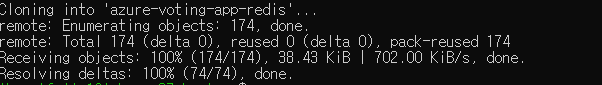

- 컨테이너 이미지 만들기

In [ ]:
docker-compose up -d

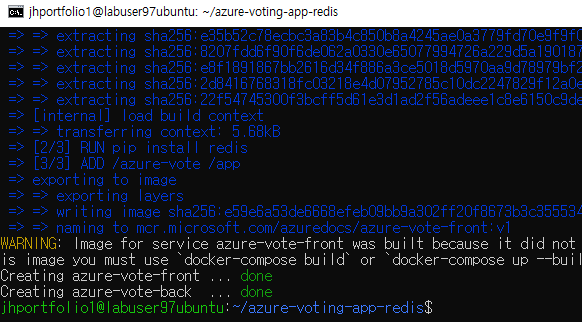

- 도커 이미지 확인

In [ ]:
$ docker images   #에러확인 

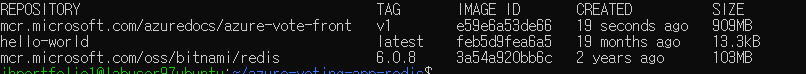

- docker -compose 파일 확인

In [ ]:
cat docker-compose.yaml

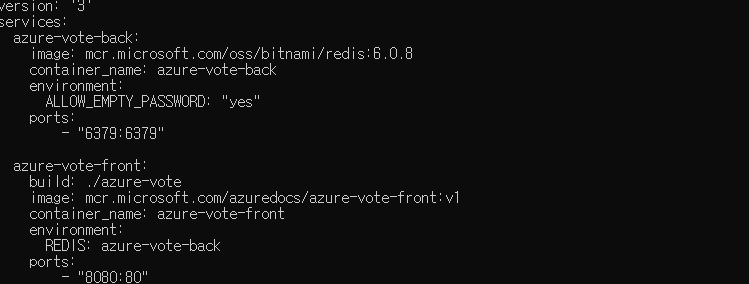

- docker -copose 설치 및 확인

In [ ]:
sudo apt-get install docker-compose

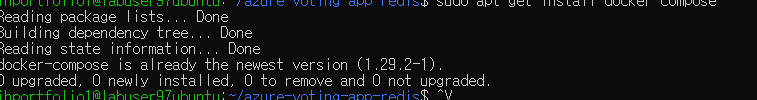

In [ ]:
docker-compose up -d

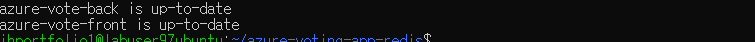

>>### (2) 인바운드(외부→내부) / 아웃바운드(내부→외부) 포트 연결

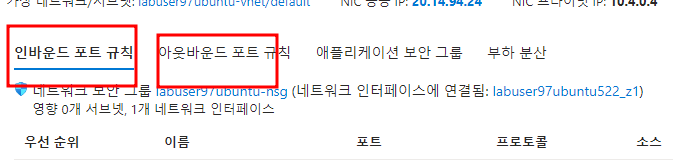

- 애져 인바운드 포트 규칙 추가

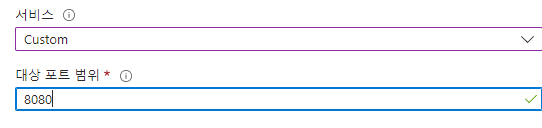

- 아웃바운드 포트 규칙 추가

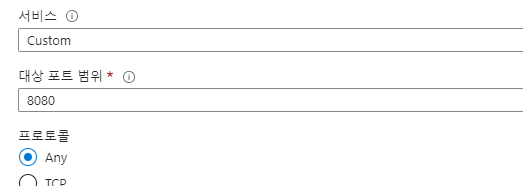

>>### (3) Docker Up/Down 

- Docker Up : 서비스 올리기

In [ ]:
docker-compose up -d

- Docker Down : 컨테이너를 도커에서 제거(서비스 다운)

In [ ]:
docker down 